In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as K
from tensorflow.python.client import device_lib
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pickle

import util
import util_keras
import graph_util as g_util

In [25]:
# file_path = 'C:/Users/Robert/git/visibility_NN/main_data_file_courses1/model_1/model_1_results.pkl'
# file_path = "H:/My Drive/nn_model_results/main_data_file_courses1/model_1/model_1_results.pkl"
# file_path = "H:/My Drive/nn_model_results/23_04_20/main_data_file_courses2/model_1/model_1_results.pkl"
# file_path = "H:/My Drive/nn_model_results/23_04_20/main_data_file_courses1/model_1/model_1_results.pkl"
# file_path = "D:/Training Results/23_04_16_training_results/main_data   _file_courses1/model_3/model_3_results.pkl"
# file_path = "D:/Training Results/23_04_20_training_results/main_data_file_courses1/model_1/model_1_results.pkl"
# file_path = "C:/Users/Robert/git/visibility_NN/main_train_results/main_data_file_courses3/model_20/model_20_results.pkl"
# file_path = "C:/Users/Robert/git/visibility_NN/main_train_results/small_main_data_file_courses3/model_15/model_15_results.pkl"
# file_path = "C:/Users/Robert/git/visibility_NN/main_data_file_courses4/model_1/model_1_results.pkl"
# file_path = "C:/Users/Robert/git/visibility_NN/mall_main_data_file_courses3/model_5/model_5_results.pkl"

# file_path = "C:/Users/Robert/git/visibility_NN/main_train_results/main_data_file_courses3/model_36" # 23 is the best performing so far
file_path = "C:/Users/Robert/git/visibility_NN/main_train_results/main_data_file_courses20/model_12"

if os.name == 'nt':
    file_path = file_path.replace('/','\\')

if file_path.endswith('.pkl'):
    pickle_file = file_path
    model_path = os.path.join(os.path.dirname(file_path),"keras_model")

else:
    model_number = os.path.basename(file_path)
    pickle_file = os.path.join(file_path,f"{model_number}_results.pkl")
    model_path = os.path.join(file_path,"keras_model")

# file_path = './model_1_results.pkl'
results = pickle.load(open(pickle_file,'rb'))
print(results.keys())

# model_path = os.path.dirname(file_path) + '/keras_model'
# 'H:/My Drive/nn_model_results/23_04_16/main_data_file_courses1/model_1_keras_model'

dict_keys(['loss', 'binary_accuracy', 'all_outputs_correct', 'val_loss', 'val_binary_accuracy', 'val_all_outputs_correct'])


In [26]:
epoch = 2
print(results["all_outputs_correct"][0])
print(results["val_all_outputs_correct"][0])

0.7601069211959839
0.8478160500526428


In [27]:
result_max = {key: (max(lst), lst.index(max(lst))) for key, lst in results.items()}

for key, (max_value, index) in result_max.items():
    print(f"For key '{key}': Largest value is {max_value} at index {index}")

For key 'loss': Largest value is 0.07591710984706879 at index 199
For key 'binary_accuracy': Largest value is 0.9991805553436279 at index 116
For key 'all_outputs_correct': Largest value is 0.9724961519241333 at index 116
For key 'val_loss': Largest value is 0.08528363704681396 at index 199
For key 'val_binary_accuracy': Largest value is 0.9980326294898987 at index 102
For key 'val_all_outputs_correct': Largest value is 0.9726026058197021 at index 89


In [28]:
result_min = {key: (min(lst), lst.index(min(lst))) for key, lst in results.items()}

for key, (min_value, index) in result_min.items():
    print(f"For key '{key}': Smallest value is {max_value} at index {index}")

For key 'loss': Largest value is 0.9726026058197021 at index 94
For key 'binary_accuracy': Largest value is 0.9726026058197021 at index 199
For key 'all_outputs_correct': Largest value is 0.9726026058197021 at index 199
For key 'val_loss': Largest value is 0.9726026058197021 at index 84
For key 'val_binary_accuracy': Largest value is 0.9726026058197021 at index 199
For key 'val_all_outputs_correct': Largest value is 0.9726026058197021 at index 199


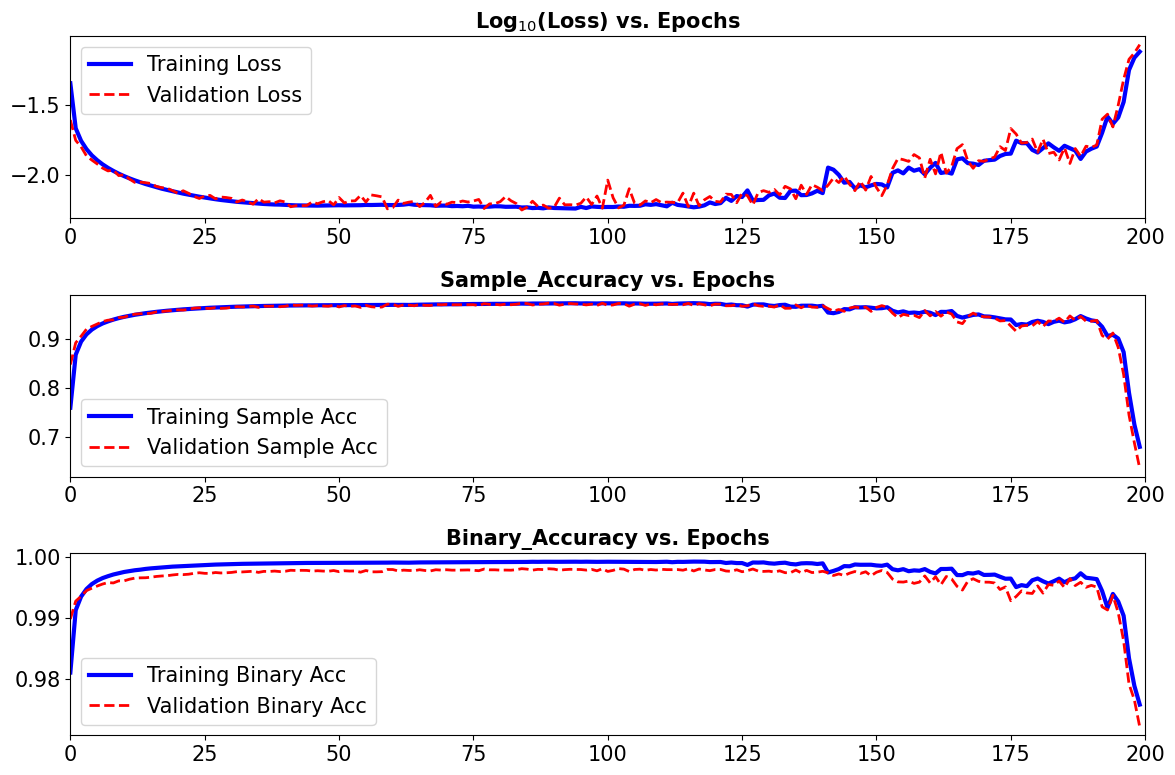

In [29]:
g_util.plot_hist(results) #plots log loss and accuracy during training

In [30]:
# Define a dictionary with the custom objects
custom_objects = {'AllOutputsCorrect': util_keras.AllOutputsCorrect}

model_predict = K.models.load_model(model_path,custom_objects=custom_objects)

In [31]:
model_predict.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              65000     
                                                                 
 dense_1 (Dense)             (None, 860)               860860    
                                                                 
 dense_2 (Dense)             (None, 720)               619920    
                                                                 
 dense_3 (Dense)             (None, 580)               418180    
                                                                 
 dense_4 (Dense)             (None, 440)               255640    
                                                                 
 dense_5 (Dense)             (None, 300)               132300    
                                                                 
 dense_6 (Dense)             (None, 160)               4

In [32]:
results

{'loss': [0.04516347497701645,
  0.021566465497016907,
  0.0175460372120142,
  0.015324054285883904,
  0.013822902925312519,
  0.012762533500790596,
  0.011927371844649315,
  0.011259086430072784,
  0.010709182359278202,
  0.01023120991885662,
  0.009829436428844929,
  0.009475374594330788,
  0.00916675291955471,
  0.008892280049622059,
  0.008630232885479927,
  0.008407476358115673,
  0.008201651275157928,
  0.007996512576937675,
  0.007830765098333359,
  0.007663315627723932,
  0.007520632352679968,
  0.007371712476015091,
  0.0072465562261641026,
  0.007131823804229498,
  0.00701131159439683,
  0.0069106752052903175,
  0.00680572772398591,
  0.006723347585648298,
  0.006641261745244265,
  0.0065727317705750465,
  0.006504671648144722,
  0.0064427899196743965,
  0.006397891789674759,
  0.0063584973104298115,
  0.006299936678260565,
  0.0062571740709245205,
  0.006219163071364164,
  0.006189723964780569,
  0.006164084188640118,
  0.006155150942504406,
  0.0061231739819049835,
  0.0061